# Identifying gene difference content in closely related strains

In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics
import sys
np.set_printoptions(threshold=sys.maxsize)

In [412]:
df_cr = pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\df_cr_final.csv")
df_cr=df_cr.set_index('Unnamed: 0')
df_pa=pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\binary_matrix.csv")
df_pa=df_pa.set_index('Unnamed: 0')

From this, we can see that the two strains differ by 98 genes. We can continue this cycle for all the 100 strains.

In [413]:
if isinstance(df_cr.iloc[0,0],float)==True:
            diff=df_pa[str(df_cr.columns[0])]-df_pa[str(df_cr.index[0])]
            gene_diff=diff.to_numpy().nonzero()
            gene_diff=gene_diff[0]
            print(len(gene_diff))

0


In [414]:
gene_list=[] #list of all closely related strains with the genes that differ
gene_diff_list=[] #list of all closely related strains with number of genes that differ

In [415]:
for i in range(0,len(df_cr.columns)): #columns + len(df_cr.columns)
    for j in range(0,len(df_cr)): #rows+len(df_cr)
        if pd.isna(df_cr.iloc[j,i])==False: #if cell is not empty, then calculate gene diff between strains
            diff=df_pa[str(df_cr.columns[i])]-df_pa[str(df_cr.index[j])]
            gene_diff=diff.to_numpy().nonzero()
            gene_diff=gene_diff[0]
            gene_list.append({"Gene Difference":gene_diff, "Gene Difference Length":len(gene_diff),
                              "Strain 1":str(df_cr.columns[i]),"Strain 2":str(df_cr.index[j])})

In [418]:
gene_list=pd.DataFrame(gene_list) #dataframe with two strains that are closely related, the length of gene difference, and
# which genes differ

We have 378 pairs of strains that are closely related.

In [419]:
gene_diff_len=gene_list['Gene Difference Length']

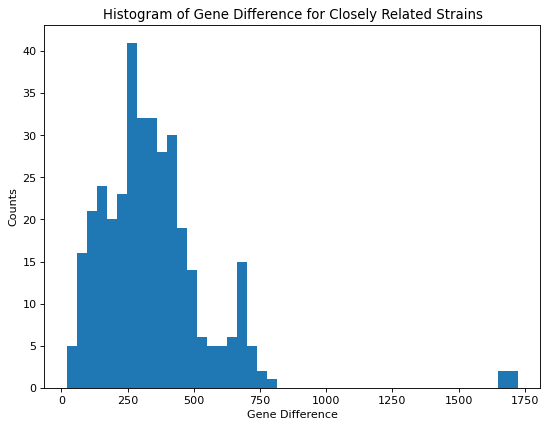

In [420]:
figure(figsize=(8, 6), dpi=80)
hist=plt.hist(gene_diff_len,bins=45)
plt.xlabel('Gene Difference')
plt.ylabel('Counts')
plt.title('Histogram of Gene Difference for Closely Related Strains')
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\gene_hist")
#plt.axvline(316.5) mean
plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\gene_hist.eps",format='eps')

In [421]:
df_dist = pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\dist_matrix.csv")
df_dist = df_dist.set_index('Unnamed: 0')
df_dist=df_dist.rename(columns={"Unnamed: 0": "Strains"})

In [422]:
dist_list=[]

In [423]:
for i in range(0,len(gene_list.index)):
    strain1=gene_list['Strain 1'].iloc[i]
    strain2=gene_list['Strain 2'].iloc[i]
    strain2=int(strain2)
    a=df_dist[strain1] #distances for all strains related to strain 1
    dist=a.loc[strain2] #dist btw strain 1 and strain 2
    dist_list.append({"Strain 1":strain1,"Strain 2":strain2, "Core Distance":dist})

In [424]:
dist_list=pd.DataFrame(dist_list) #dataframe with two strains that are closely related and dist between them

In [425]:
df_col_merged = pd.concat([dist_list, gene_list], axis=1) #merged both dataframe

In [427]:
df_col_merged = df_col_merged.loc[:,~df_col_merged.columns.duplicated()].copy() #removed duplicate columns

In [428]:
# calculating the trend line
#z = np.polyfit(df_col_merged['Core Distance'],df_col_merged['Gene Difference Length'], 1)
#p = np.poly1d(z)
#plt.plot(df_col_merged['Core Distance'],p(df_col_merged['Core Distance']),"r--")
# the line equation:
#print("y=%.6fx+(%.6f)"%(z[0],z[1]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


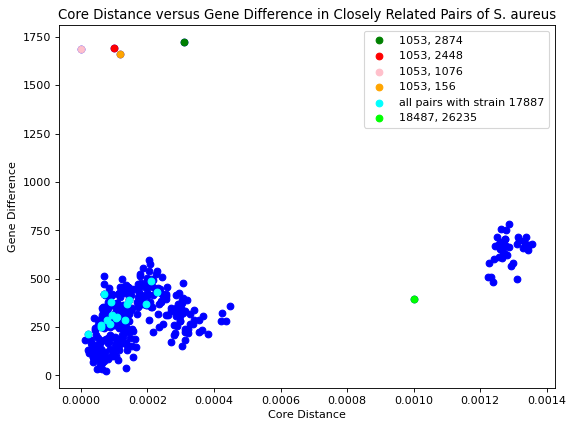

In [429]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df_col_merged['Core Distance'],df_col_merged['Gene Difference Length'], color='b')
plt.scatter(df_col_merged['Core Distance'][8],df_col_merged['Gene Difference Length'][8], color='g',label='1053, 2874')
plt.scatter(df_col_merged['Core Distance'][9],df_col_merged['Gene Difference Length'][9], color='red',label='1053, 2448')
plt.scatter(df_col_merged['Core Distance'][10],df_col_merged['Gene Difference Length'][10], color='pink',label='1053, 1076')
plt.scatter(df_col_merged['Core Distance'][7],df_col_merged['Gene Difference Length'][7], color='orange',label='1053, 156')
plt.scatter(df_col_merged['Core Distance'][39],df_col_merged['Gene Difference Length'][39], color='cyan')#,label='17887, 12894')
plt.scatter(df_col_merged['Core Distance'][40],df_col_merged['Gene Difference Length'][40], color='cyan')#,label='17887, 9594')
plt.scatter(df_col_merged['Core Distance'][41],df_col_merged['Gene Difference Length'][41], color='cyan')#,label='17887, 43706')
plt.scatter(df_col_merged['Core Distance'][42],df_col_merged['Gene Difference Length'][42], color='cyan')#,label='17887, 43738')
plt.scatter(df_col_merged['Core Distance'][43],df_col_merged['Gene Difference Length'][43], color='cyan')#,label='17887, 18058')
plt.scatter(df_col_merged['Core Distance'][44],df_col_merged['Gene Difference Length'][44], color='cyan')#,label='17887, 44112')
plt.scatter(df_col_merged['Core Distance'][45],df_col_merged['Gene Difference Length'][45], color='cyan')#,label='17887, 17826')
plt.scatter(df_col_merged['Core Distance'][46],df_col_merged['Gene Difference Length'][46], color='cyan')#,label='17887, 43890')
plt.scatter(df_col_merged['Core Distance'][47],df_col_merged['Gene Difference Length'][47], color='cyan')#,label='17887, 21325')
plt.scatter(df_col_merged['Core Distance'][48],df_col_merged['Gene Difference Length'][48], color='cyan')#,label='17887, 43498')
plt.scatter(df_col_merged['Core Distance'][49],df_col_merged['Gene Difference Length'][49], color='cyan')#,label='17887, 42995')
plt.scatter(df_col_merged['Core Distance'][50],df_col_merged['Gene Difference Length'][50], color='cyan')#,label='17887, 18653')
plt.scatter(df_col_merged['Core Distance'][51],df_col_merged['Gene Difference Length'][51], color='cyan')#,label='17887, 17629')
plt.scatter(df_col_merged['Core Distance'][52],df_col_merged['Gene Difference Length'][52], color='cyan')#,label='17887, 36231')
plt.scatter(df_col_merged['Core Distance'][53],df_col_merged['Gene Difference Length'][53], color='cyan')
plt.scatter(df_col_merged['Core Distance'][54],df_col_merged['Gene Difference Length'][54], color='cyan',
            label='all pairs with strain 17887')
plt.scatter(df_col_merged['Core Distance'][272],df_col_merged['Gene Difference Length'][272], color='lime',label='18487, 26235')
#plt.plot(df_col_merged['Core Distance'],p(df_col_merged['Core Distance']),"r--")
plt.title('Core Distance versus Gene Difference in Closely Related Pairs of S. aureus')
plt.xlabel('Core Distance')
plt.ylabel('Gene Difference')
plt.legend()
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_vs_dist")
plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_vs_dist.eps",format='eps')

In [430]:
statistics.stdev(df_col_merged['Gene Difference Length'])

218.61835003224942

Let's see which gene was included the most in the gene difference.

In [431]:
all_genes=[]
for i in range(0,len(df_col_merged['Gene Difference'])):
    all_genes.append(df_col_merged['Gene Difference'][i]) #make the series of arrays into just one array

In [432]:
genes_list=np.concatenate(all_genes).ravel().tolist() #make all the arrays just flatten into one list

In [433]:
from collections import Counter

In [434]:
count=Counter(genes_list) #count all instances of genes in closely related strains
count=count.most_common() #sort by max occurrences to min
#gene ID with number of occurences

Now we have a detailed list of all the genes in the closely related strains ranked by how often they show up in the pairs.

In [435]:
df_gene=pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\presence_absence.csv") #dataframe with gene names

C:\Users\jojoa\.conda\envs\disperse_env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [436]:
df_gene['Gene'][2333] #gene with most occurences

'group_1428'

This means that gene number 2333 is the highest occuring gene, with the actual gene being group_1428.

In [437]:
count

[(2333, 167),
 (2346, 166),
 (2336, 163),
 (2544, 163),
 (2363, 162),
 (2414, 162),
 (2330, 160),
 (2410, 160),
 (2374, 160),
 (2340, 158),
 (2384, 157),
 (2439, 156),
 (2371, 156),
 (2353, 156),
 (2825, 156),
 (2417, 155),
 (2794, 155),
 (2309, 154),
 (2311, 154),
 (2312, 154),
 (2315, 154),
 (2321, 154),
 (2324, 154),
 (2263, 153),
 (2634, 153),
 (2310, 152),
 (2317, 152),
 (2319, 152),
 (2334, 152),
 (2521, 152),
 (2356, 151),
 (2341, 150),
 (2313, 150),
 (2435, 148),
 (2921, 147),
 (2446, 147),
 (2594, 145),
 (2459, 144),
 (2328, 144),
 (2466, 144),
 (2568, 144),
 (2723, 142),
 (3200, 141),
 (2462, 141),
 (2655, 139),
 (2288, 139),
 (3144, 138),
 (2901, 138),
 (2644, 137),
 (2646, 137),
 (2667, 137),
 (2668, 137),
 (2670, 137),
 (2415, 136),
 (2893, 134),
 (2659, 134),
 (2713, 134),
 (3140, 133),
 (2682, 132),
 (2551, 132),
 (2553, 132),
 (2834, 131),
 (2660, 131),
 (2421, 130),
 (2380, 129),
 (2877, 129),
 (2936, 129),
 (2985, 129),
 (3158, 128),
 (2571, 128),
 (3262, 128),
 (3270

In [438]:
x_val = [x[0] for x in count] #gene IDs
y_val = [x[1] for x in count] #number of time genes occur

We want the number of times the genes occur and the number of genes that have that occurence count.

In [439]:
num_list=[]
for i in range(0,len(count)):
    j=count[i][1]
    num=y_val.count(j)
    num_list.append(num) #number of genes that have occurence count corresponding to number of timess the gene occurs

In [440]:
#figure(figsize=(8, 6), dpi=80)
#plt.bar(y_val,num_list,color='green',width=10)
#plt.ylabel('Number of Genes')
#plt.xlabel('Number of Occurrences')
#plt.title('Frequency of Genes in Closely Related Strains')
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\freq_bar")
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\site_freq.eps",format='eps')

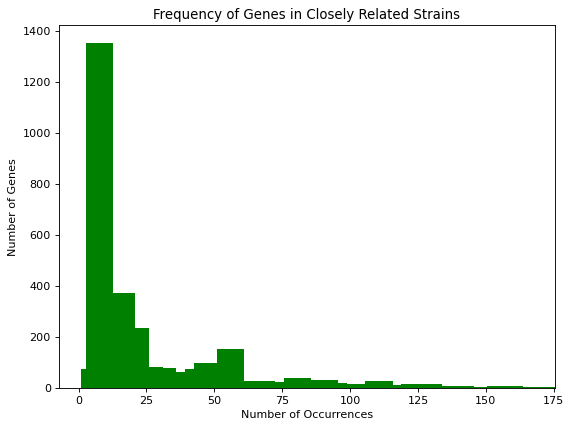

In [441]:
#histogram
figure(figsize=(8, 6), dpi=80)
plt.hist(y_val,color='green',width=10,bins=100)
plt.ylabel('Number of Genes')
plt.xlabel('Number of Occurrences')
plt.title('Frequency of Genes in Closely Related Strains')
plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\site_freq.eps",format='eps')

In [442]:
np.mean(y_val)

29.620332450012047

In [443]:
freq = {'Gene Index Number': x_val, 'Frequency': y_val}
df_freq = pd.DataFrame(data=freq)

In [444]:
df_freq

,Gene Index Number,Frequency
0,2333,167
1,2346,166
2,2336,163
3,2544,163
4,2363,162
...,...,...
4146,6369,1
4147,6385,1
4148,7190,1
4149,11447,1


In [445]:
df_gene['Gene'][2333] #gene with most occurences

'group_1428'

In [446]:
df_freq.to_csv(r"C:\Users\jojoa\GitHub\staph\data\gene_frequency.csv",index=False)

Now we can arrange the gene difference lengths in descending order to see which has the highest gene difference.

In [447]:
df_col_merged['Gene Difference Length'].sort_values(ascending=False)

8      1724
9      1693
10     1686
7      1659
314     783
       ... 
75       36
170      36
174      35
124      33
120      21
Name: Gene Difference Length, Length: 354, dtype: int64

In [464]:
df_col_merged['Gene Difference'][7]

array([  43,  265,  344,  368,  399,  409,  451,  486,  493,  516,  539,
        541,  558,  560,  561,  562,  581,  582,  584,  586,  594,  601,
        610,  616,  620,  627,  637,  646,  648,  652,  653,  654,  669,
        673,  676,  682,  684,  685,  699,  700,  701,  704,  712,  713,
        715,  716,  720,  725,  727,  731,  732,  734,  738,  746,  751,
        753,  755,  758,  760,  761,  765,  766,  767,  768,  769,  778,
        781,  784,  785,  786,  788,  793,  798,  799,  802,  803,  804,
        807,  810,  812,  815,  820,  821,  827,  828,  830,  831,  832,
        833,  835,  838,  839,  843,  848,  849,  850,  851,  853,  854,
        856,  861,  862,  863,  864,  865,  866,  868,  869,  870,  872,
        873,  875,  879,  880,  881,  882,  883,  885,  886,  887,  888,
        890,  891,  894,  901,  902,  903,  904,  905,  906,  907,  908,
        909,  910,  911,  912,  913,  914,  915,  916,  918,  919,  920,
        922,  924,  928,  929,  930,  932,  935,  9

In [449]:
(df_col_merged[df_col_merged['Strain 1'].str.contains('26235')])

,Strain 1,Strain 2,Core Distance,Gene Difference,Gene Difference Length


In [450]:
df_col_merged.to_csv(r"C:\Users\jojoa\GitHub\staph\data\strain_pairs.csv",index=False)

In [451]:
Counter(strain1).most_common()

[('2', 1), ('8', 1), ('7', 1), ('4', 1)]

We can check for common genes that are in the gene difference for similar strain pairs.

In [452]:
([np.intersect1d(df_col_merged['Gene Difference'][0],i) for i in df_col_merged['Gene Difference']])

[array([1886, 1939, 1969, 2080, 2083, 2093, 2120, 2161, 2165, 2177, 2216,
        2221, 2270, 2355, 2380, 2408, 2439, 2452, 2455, 2472, 2561, 2611,
        2613, 2643, 2677, 2695, 2696, 2728, 2743, 2772, 2785, 2833, 2894,
        2942, 2970, 2978, 2989, 2990, 3003, 3011, 3015, 3024, 3028, 3097,
        3119, 3120, 3122, 3136, 3149, 3151, 3154, 3157, 3158, 3193, 3203,
        3216, 3231, 3247, 3287, 3303, 3307, 3366, 3372, 3374, 3381, 3404,
        3408, 3414, 3432, 3447, 3451, 3453, 3464, 3472, 3527, 3547, 3603,
        3614, 3627, 3663, 3672, 3696, 3723, 3776, 3790, 3798, 3801, 3880,
        3899, 4177, 4509, 4525, 4898, 5004, 5320, 5384, 5416, 6318],
       dtype=int64),
 array([1886, 1939, 2083, 2093, 2120, 2165, 2177, 2221, 2270, 2355, 2408,
        2452, 2455, 2561, 2611, 2677, 2695, 2696, 2743, 2772, 2785, 2833,
        2894, 2970, 2978, 2989, 2990, 3011, 3015, 3024, 3028, 3097, 3119,
        3120, 3136, 3149, 3151, 3154, 3157, 3193, 3216, 3231, 3247, 3287,
        3303, 3307, 33

In [453]:
common=np.intersect1d(df_col_merged['Gene Difference'][0],df_col_merged['Gene Difference'][1],)
common=np.intersect1d(common,df_col_merged['Gene Difference'][2])
common=np.intersect1d(common,df_col_merged['Gene Difference'][3])
common=np.intersect1d(common,df_col_merged['Gene Difference'][4])
common

array([1939, 2083, 2093, 2120, 2165, 2177, 2221, 2270, 2355, 2408, 2452,
       2455, 2561, 2611, 2677, 2695, 2696, 2743, 2772, 2785, 2833, 2894,
       2970, 2978, 2989, 2990, 3011, 3024, 3028, 3097, 3119, 3120, 3136,
       3149, 3151, 3154, 3157, 3193, 3216, 3231, 3287, 3303, 3307, 3366,
       3372, 3404, 3408, 3414, 3432, 3447, 3451, 3453, 3472, 3527, 3547,
       3603, 3614, 3627, 3696, 3723, 3776, 3790, 3798, 3801, 4177, 4898],
      dtype=int64)

In [454]:
element=df_col_merged['Gene Difference'][0]
(element)

array([1886, 1939, 1969, 2080, 2083, 2093, 2120, 2161, 2165, 2177, 2216,
       2221, 2270, 2355, 2380, 2408, 2439, 2452, 2455, 2472, 2561, 2611,
       2613, 2643, 2677, 2695, 2696, 2728, 2743, 2772, 2785, 2833, 2894,
       2942, 2970, 2978, 2989, 2990, 3003, 3011, 3015, 3024, 3028, 3097,
       3119, 3120, 3122, 3136, 3149, 3151, 3154, 3157, 3158, 3193, 3203,
       3216, 3231, 3247, 3287, 3303, 3307, 3366, 3372, 3374, 3381, 3404,
       3408, 3414, 3432, 3447, 3451, 3453, 3464, 3472, 3527, 3547, 3603,
       3614, 3627, 3663, 3672, 3696, 3723, 3776, 3790, 3798, 3801, 3880,
       3899, 4177, 4509, 4525, 4898, 5004, 5320, 5384, 5416, 6318],
      dtype=int64)

In [455]:
df_col_merged['Gene Difference']

0      [1886, 1939, 1969, 2080, 2083, 2093, 2120, 216...
1      [1886, 1939, 2027, 2042, 2083, 2093, 2120, 216...
2      [1939, 2080, 2083, 2093, 2120, 2165, 2177, 222...
3      [1939, 1994, 2027, 2083, 2093, 2120, 2123, 216...
4      [1939, 2080, 2083, 2093, 2120, 2154, 2162, 216...
                             ...                        
349    [1988, 2039, 2042, 2055, 2075, 2076, 2077, 209...
350    [2055, 2075, 2080, 2100, 2106, 2132, 2141, 214...
351    [1988, 2037, 2055, 2075, 2085, 2100, 2101, 210...
352    [1902, 1989, 2034, 2080, 2083, 2245, 2249, 225...
353    [1578, 1587, 1628, 1636, 1645, 1655, 1656, 166...
Name: Gene Difference, Length: 354, dtype: object

In [458]:
#common=np.intersect1d(df_col_merged['Gene Difference'][0],df_col_merged['Gene Difference'][1])
#for i in range(start,end):
#    common=np.intersect1d(df_col_merged['Gene Difference'][i],df_col_merged['Gene Difference'][i+1])
#    common=np.intersect1d(common,df_col_merged['Gene Difference'][i])
#    gene_com=common
#    length=len(gene_com)

In [459]:
df_col_merged.loc[39]

Strain 1                                                              17887
Strain 2                                                              12894
Core Distance                                                       0.00011
Gene Difference           [1966, 2042, 2069, 2236, 2249, 2253, 2265, 227...
Gene Difference Length                                                  303
Name: 39, dtype: object

In [460]:
df_col_merged[df_col_merged['Strain 1'].str.contains('17887')]['Gene Difference'].str.contains('2333')

39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
50   NaN
51   NaN
52   NaN
53   NaN
54   NaN
Name: Gene Difference, dtype: float64

In [461]:
df_pa['1053'].iloc[2333]

0

In [463]:
df_col_merged[df_col_merged['Strain 1'].str.contains('1053')]['Gene Difference']

7     [43, 265, 344, 368, 399, 409, 451, 486, 493, 5...
8     [43, 265, 344, 368, 399, 409, 451, 486, 493, 5...
9     [43, 265, 344, 368, 399, 409, 451, 486, 493, 5...
10    [43, 265, 344, 368, 399, 409, 451, 486, 493, 5...
Name: Gene Difference, dtype: object

In [315]:
df_pa['17887'].iloc[2333]

1

In [319]:
df_col_merged['Gene Difference'].iloc[272]

array([ 1840,  1993,  2075,  2100,  2106,  2132,  2148,  2150,  2151,
        2152,  2153,  2154,  2155,  2156,  2157,  2159,  2161,  2162,
        2171,  2188,  2189,  2210,  2212,  2213,  2224,  2225,  2230,
        2238,  2268,  2269,  2303,  2307,  2309,  2310,  2311,  2312,
        2313,  2315,  2317,  2319,  2321,  2324,  2328,  2330,  2333,
        2334,  2336,  2340,  2341,  2344,  2345,  2346,  2358,  2361,
        2363,  2365,  2371,  2374,  2391,  2398,  2410,  2411,  2414,
        2415,  2432,  2439,  2446,  2459,  2475,  2484,  2486,  2499,
        2532,  2536,  2544,  2554,  2560,  2567,  2576,  2602,  2603,
        2607,  2608,  2610,  2612,  2614,  2623,  2626,  2627,  2634,
        2635,  2637,  2663,  2666,  2674,  2676,  2678,  2681,  2687,
        2697,  2700,  2705,  2707,  2715,  2717,  2718,  2723,  2728,
        2734,  2737,  2739,  2740,  2754,  2765,  2774,  2781,  2793,
        2795,  2797,  2803,  2806,  2813,  2819,  2820,  2821,  2824,
        2827,  2845,

In [326]:
df_pa['18487'].iloc[270]

1

In [328]:
#index 2348 is group_2446